In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import tensorflow as tf
from tensorflow import keras



print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
Pandas: 1.5.3
Numpy: 1.23.5
Sklearn: 1.2.1
Matplotlib: 3.7.0
Keras: 2.10.0


In [2]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [3]:

import os

In [4]:
os.getcwd()

'C:\\Users\\hp\\Documents\\Mainor project'

In [4]:
os.chdir('C:\\Users\\hp\\OneDrive\\Desktop\\dataset\\archive 1')

In [5]:
os.getcwd()

'C:\\Users\\hp\\OneDrive\\Desktop\\dataset\\archive 1'

# 1.Importing the Dataset##
##This dataset contains patient data concerning heart disease diagnosis that was collected at several locations around the world. There are 76 attributes, including age, sex, resting blood pressure, cholestoral levels, echocardiogram data, exercise habits, and many others. To data, all published studies using this data focus on a subset of 14 attributes ##

In [7]:
cleveland = pd.read_csv('processed_cleveland.csv')

NameError: name 'pd' is not defined

In [8]:
print( 'Shape of DataFrame: {}'.format(cleveland.shape))
print (cleveland.loc[1])

NameError: name 'cleveland' is not defined

In [9]:
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
280,57,1,4,110,335,0,0,143,1,3.0,2,1,7,2
281,47,1,3,130,253,0,0,179,0,0.0,1,0,3,0
282,55,0,4,128,205,0,1,130,1,2.0,2,1,7,3
283,35,1,2,122,192,0,0,174,0,0.0,1,0,3,0
284,61,1,4,148,203,0,0,161,0,0.0,1,1,7,2
285,58,1,4,114,318,0,1,140,0,4.4,3,3,6,4
286,58,0,4,170,225,1,2,146,1,2.8,2,2,6,2
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7,0
288,56,1,2,130,221,0,2,163,0,0.0,1,0,7,0
289,56,1,2,120,240,0,0,169,0,0.0,3,0,3,0


In [10]:
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
280,57,1,4,110,335,0,0,143,1,3.0,2,1,7,2
281,47,1,3,130,253,0,0,179,0,0.0,1,0,3,0
282,55,0,4,128,205,0,1,130,1,2.0,2,1,7,3
283,35,1,2,122,192,0,0,174,0,0.0,1,0,3,0
284,61,1,4,148,203,0,0,161,0,0.0,1,1,7,2
285,58,1,4,114,318,0,1,140,0,4.4,3,3,6,4
286,58,0,4,170,225,1,2,146,1,2.8,2,2,6,2
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7,0
288,56,1,2,130,221,0,2,163,0,0.0,1,0,7,0
289,56,1,2,120,240,0,0,169,0,0.0,3,0,3,0


In [11]:
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
280,57,1,4,110,335,0,0,143,1,3.0,2,1,7,2
281,47,1,3,130,253,0,0,179,0,0.0,1,0,3,0
282,55,0,4,128,205,0,1,130,1,2.0,2,1,7,3
283,35,1,2,122,192,0,0,174,0,0.0,1,0,3,0
284,61,1,4,148,203,0,0,161,0,0.0,1,1,7,2
285,58,1,4,114,318,0,1,140,0,4.4,3,3,6,4
286,58,0,4,170,225,1,2,146,1,2.8,2,2,6,2
288,56,1,2,130,221,0,2,163,0,0.0,1,0,7,0
289,56,1,2,120,240,0,0,169,0,0.0,3,0,3,0
290,67,1,3,152,212,0,2,150,0,0.8,2,0,7,1


In [12]:
print(data.shape)
print(data.dtypes)

(297, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca           object
thal         object
num           int64
dtype: object


In [13]:
data = data.apply(pd.to_numeric)
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
num           int64
dtype: object

In [14]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


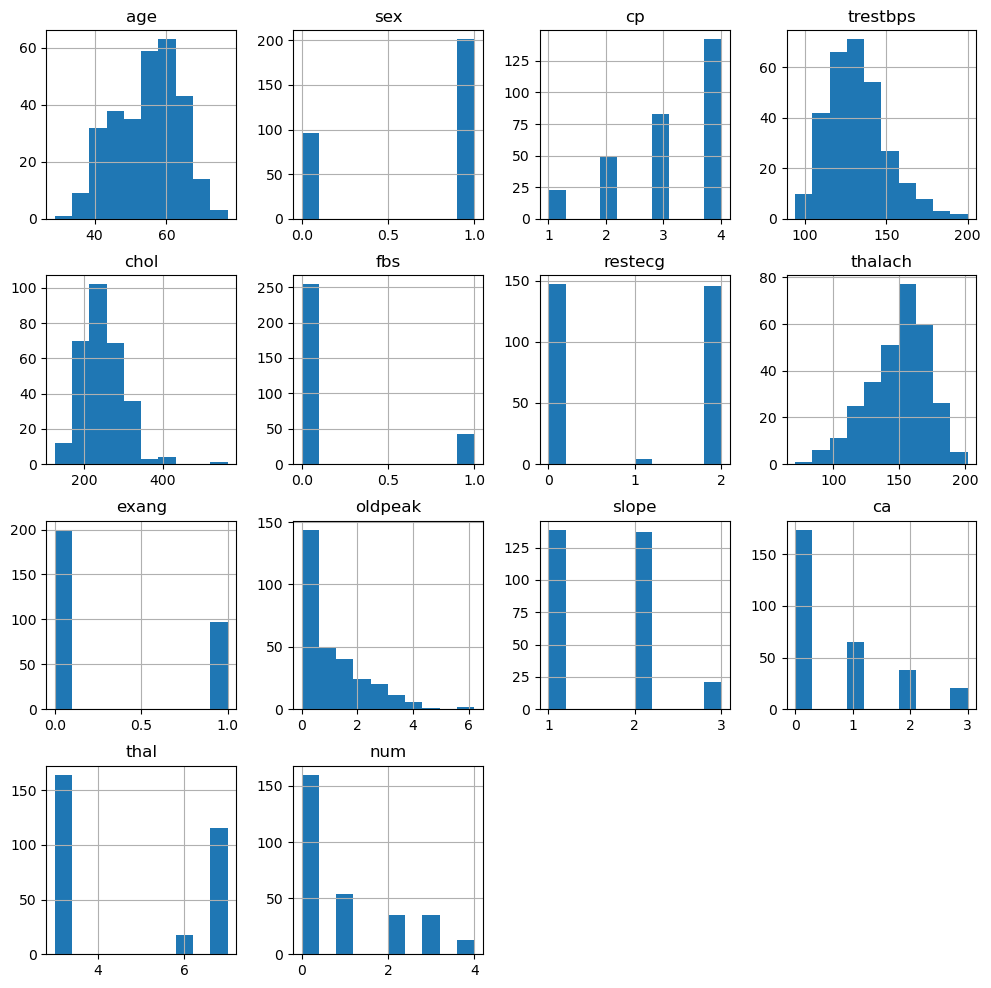

In [15]:
data.hist(figsize = (12, 12))
plt.show()

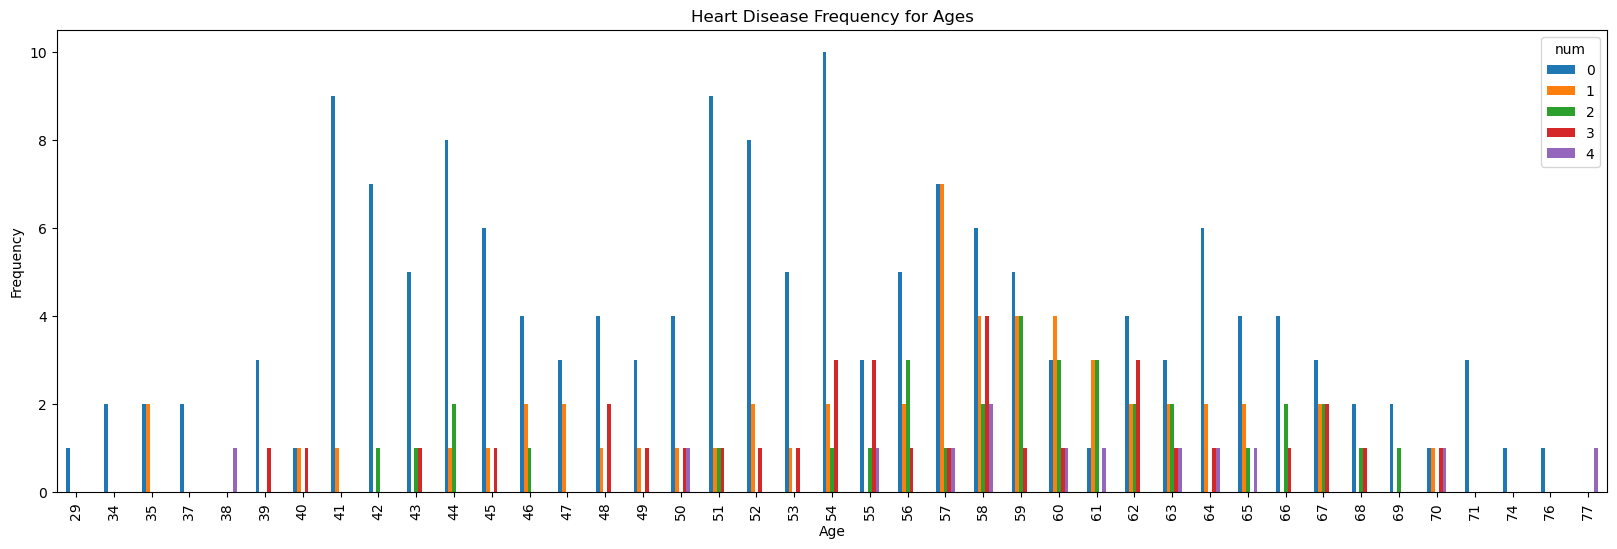

In [16]:
pd.crosstab(data.age,data.num).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

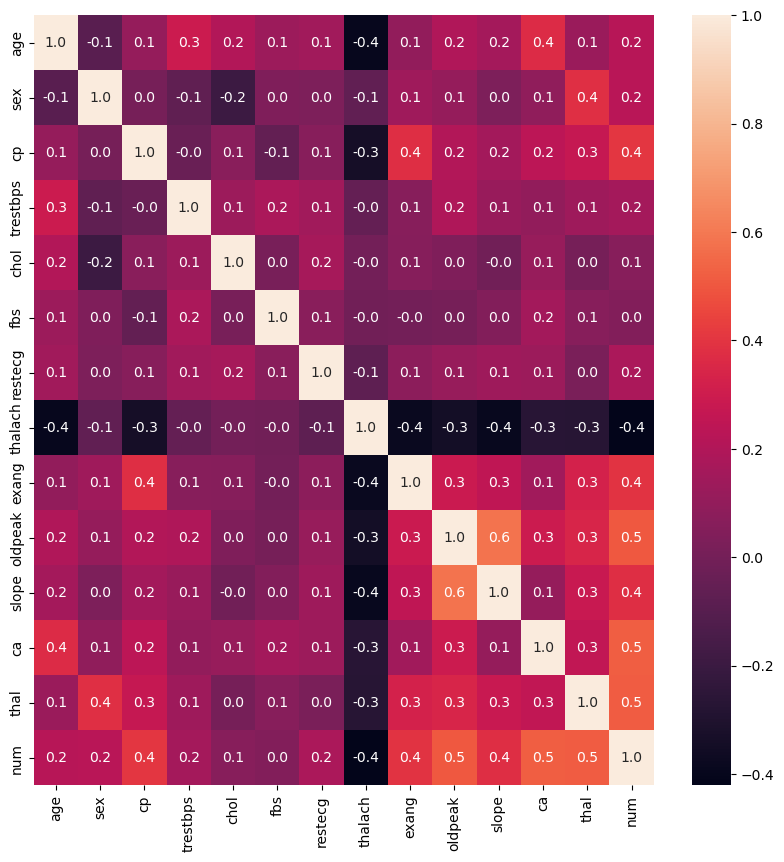

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

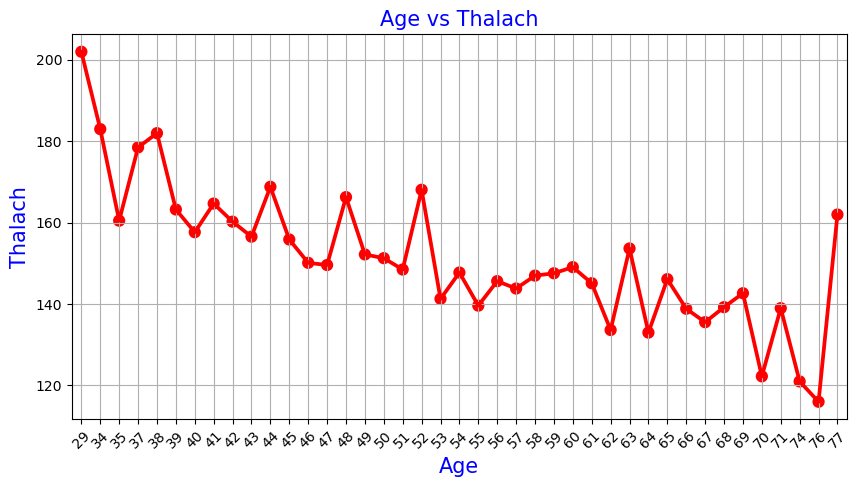

In [18]:
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red')
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

# 2.Create Training and Testing Datasets#
Now that we have preprocessed the data appropriately, we can split it into training and testings datasets. We will use Sklearn's train_test_split() function to generate a training dataset (80 percent of the total data) and testing dataset (20 percent of the total data).

In [19]:
X = np.array(data.drop(['num'], axis=1))
y = np.array(data['num'])

In [20]:
X[0]

array([ 63. ,   1. ,   1. , 145. , 233. ,   1. ,   2. , 150. ,   0. ,
         2.3,   3. ,   0. ,   6. ])

In [21]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [22]:
X[0]

array([ 0.93618065,  0.69109474, -2.24062879,  0.75038004, -0.27644339,
        2.43042728,  1.01019851,  0.01749443, -0.69641941,  1.06896529,
        2.26414539, -0.72197605,  0.65587737])

In [23]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [24]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(237, 5)
[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [25]:
X_train[0]

array([ 0.27205887, -1.44697961, -1.20245913, -0.09550637, -0.21865103,
       -0.41145029,  1.01019851,  1.06539633, -0.69641941, -0.90671163,
        0.6437811 ,  0.34482438, -0.89422007])

# 3.Building and Training the Neural Network# 
Now that we have our data fully processed and split into training and testing datasets, we can begin building a neural network to solve this classification problem. Using keras, we will define a simple neural network with one hidden layer. Since this is a categorical classification problem, we will use a softmax activation function in the final layer of our network and a categorical_crossentropy loss during our training phase.

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    return model
model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\hp\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [27]:
model.add(Dense(5, activation='softmax'))



In [28]:

model.add(Dense(1))

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=2)

Epoch 1/50
119/119 [==============================] - 2s 6ms/step - loss: 0.1950 - val_loss: 0.1630
Epoch 2/50
119/119 [==============================] - 0s 4ms/step - loss: 0.1611 - val_loss: 0.1604
Epoch 3/50
119/119 [==============================] - 0s 4ms/step - loss: 0.1603 - val_loss: 0.1602
Epoch 4/50
119/119 [==============================] - 1s 4ms/step - loss: 0.1601 - val_loss: 0.1601
Epoch 5/50
119/119 [==============================] - 0s 4ms/step - loss: 0.1601 - val_loss: 0.1600
Epoch 6/50
119/119 [==============================] - 0s 3ms/step - loss: 0.1600 - val_loss: 0.1600
Epoch 7/50
119/119 [==============================] - 0s 4ms/step - loss: 0.1600 - val_loss: 0.1600
Epoch 8/50
119/119 [==============================] - 0s 4ms/step - loss: 0.1600 - val_loss: 0.1600
Epoch 9/50
119/119 [==============================] - 0s 4ms/step - loss: 0.1600 - val_loss: 0.1600
Epoch 10/50
119/119 [==============================] - 0s 4ms/step - loss: 0.1600 - val_loss: 0.1600

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

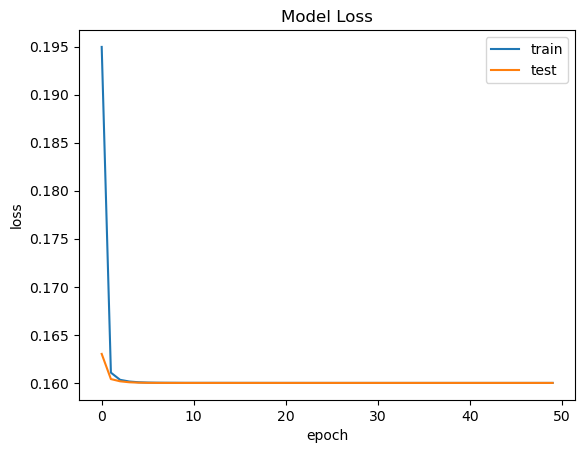

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# 4.Improving Results - A Binary Classification Problem
although we achieved promising results, we still have a fairly large error. This could be because it is very difficult to distinguish between the different severity levels of heart disease (classes 1 - 4). Let's simplify the problem by converting the data to a binary classification problem - heart disease or no heart disease.

In [33]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0]


In [34]:
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                224       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Epoch 1/50
24/24 [==============================] - 1s 18ms/step - loss: 0.6923 - accuracy: 0.6203 - val_loss: 0.6872 - val_accuracy: 0.8167
Epoch 2/50
24/24 [==============================] - 0s 6ms/step - loss: 0.6844 - accuracy: 0.6878 - val_loss: 0.6716 - val_accuracy: 0.8167
Epoch 3/50
24/24 [==============================] - 0s 6ms/step - loss: 0.6635 - accuracy: 0.7637 - val_loss: 0.6394 - val_accuracy: 0.8333
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6360 - accuracy: 0.7595 - val_loss: 0.5974 - val_accuracy: 0.8333
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 0.5916 - accuracy: 0.8059 - val_loss: 0.5479 - val_accuracy: 0.8333
Epoch 6/50
24/24 [==============================] - 0s 7ms/step - loss: 0.5576 - accuracy: 0.8143 - val_loss: 0.5036 - val_accuracy: 0.8667
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 0.5304 - accuracy: 0.8017 - val_loss: 0.4634 - val_accuracy: 0.8667
Epoch 8/50
24/24 [=

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

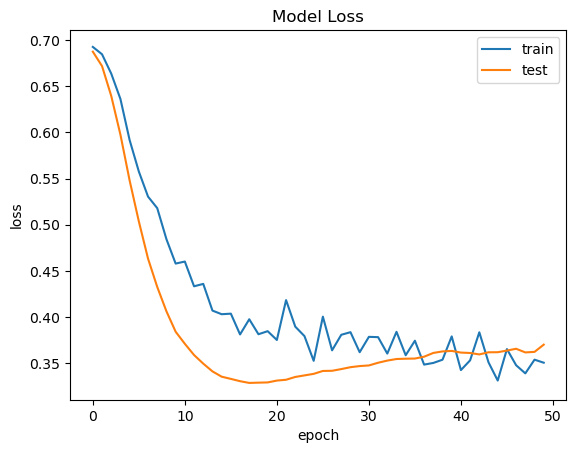

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# 5.Results and Metrics
The accuracy results we have been seeing are for the training data, but what about the testing dataset? If our model's cannot generalize to data that wasn't used to train them, they won't provide any utility.

Let's test the performance of both our categorical model and binary model. To do this, we will make predictions on the training dataset and calculate performance metrics using Sklearn.

In [38]:
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

2/2 [==============================] - 0s 3ms/step
Results for Binary Model
0.8333333333333334
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

